In [1]:
# Prever os preços da Chocolura

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math
from IPython.display import Latex
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.tsa.api as smtsa

In [13]:
dados_ar1 = pd.read_csv('../01.Dados\produto_ar1.csv')
dados_ar1.head()

,Data,Preco
0,0.01,10.000000
1,0.02,8.710519
2,0.03,9.026865
3,0.04,10.134112
4,0.05,10.529007


Text(0, 0.5, 'Preços')

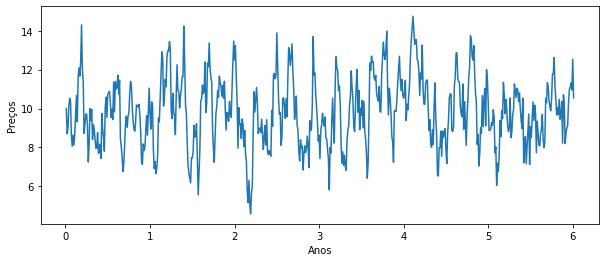

In [14]:
plt.figure(figsize=(10,4))
plt.plot(dados_ar1['Data'],dados_ar1['Preco'])
plt.xlabel('Anos')
plt.ylabel('Preços')

In [15]:
#Função de autocorrelação e autocorrelaçao parcial
plt_acf(dados_ar1['Preco']);

NameError: name 'plt_acf' is not defined

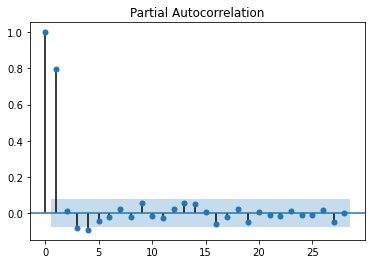

In [16]:
plot_pacf(dados_ar1['Preco']);

In [17]:
# Modelos autoregressinos
# ACF - Decai gradualemente
# PACF - Decai abruptamente depois de P lags(modelos autoregressios de ordem p, p pontos anteriores)

# Modelo autoregressivo de ordem p
Math(r'y_k = c+\phi_t y_{t-1} + \epsilon_t')


<IPython.core.display.Math object>

In [23]:
dados_ar2 = pd.read_csv('../01.Dados\produto_ar2.csv')
dados_ar2.head()

,Data,Preco
0,0.01,10.000000
1,0.02,10.139652
2,0.03,9.995199
3,0.04,10.731890
4,0.05,8.793082


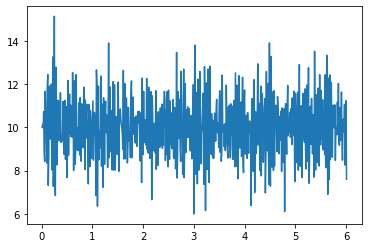

In [24]:
plt.plot(dados_ar2['Data'],dados_ar2['Preco'])

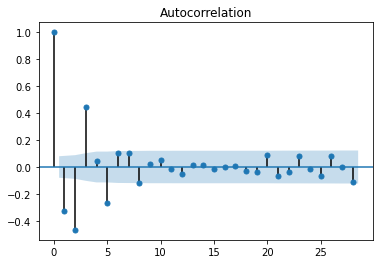

In [25]:
plot_acf(dados_ar2['Preco']);

In [26]:
# Decaimento suave

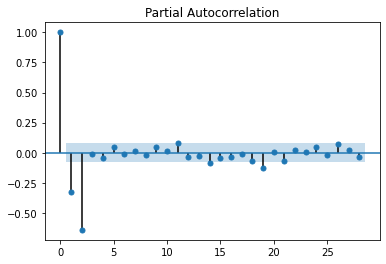

In [27]:
plot_pacf(dados_ar2['Preco']);

Decaimento abrupto de ordem 2, pois depois do lag 2 que teve a queda

In [37]:
dados_ar3 = pd.read_csv('../01.Dados\produto_ar3.csv')
dados_ar3.head()

,Data,Preco
0,0.01,10.000000
1,0.02,9.166402
2,0.03,9.736911
3,0.04,9.835733
4,0.05,10.765316


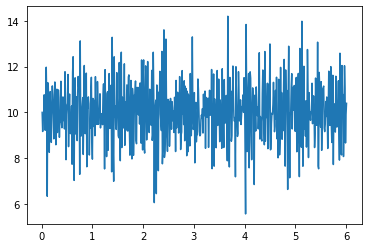

In [38]:
plt.plot(dados_ar3['Data'],dados_ar3['Preco'])

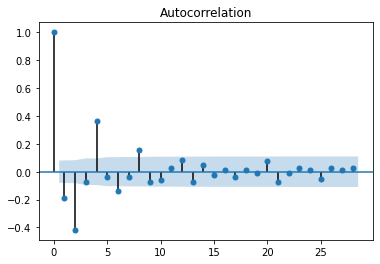

In [43]:
plot_acf(dados_ar3['Preco']);

In [44]:
# Decaimento suave

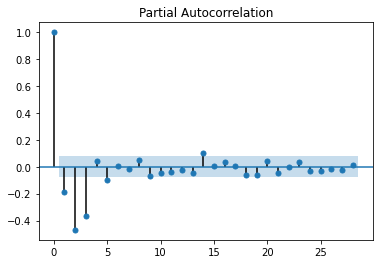

In [45]:
plot_pacf(dados_ar3['Preco']);

Decaimento abrupto de ordem 3, pois depois do lag 3 que teve a queda

# Primeira previsões - Modelos MA

## Modelos com autocorelation suave e partial autocorrlation abrupto

In [47]:
dados_ar1.shape

(601, 2)

In [52]:
def previsao(dados,titulo,ordem):
    dados_p1 = dados[0:500]   #treino
    dados_p2 = dados[500:600] #teste
    modelo_arn = smtsa.ARMA(dados_p1['Preco'],order=(ordem,0)).fit()
    modelo_previsto = modelo_arn.predict(start=500, end=599)
    plt.figure(figsize=(10,4))
    plt.plot(dados_p1['Data'],dados_p1['Preco'])
    plt.plot(dados_p2['Data'],dados_p2['Preco'])
    plt.plot(dados_p2['Data'],modelo_previsto,'r.')
    plt.title('{}'.format(titulo))

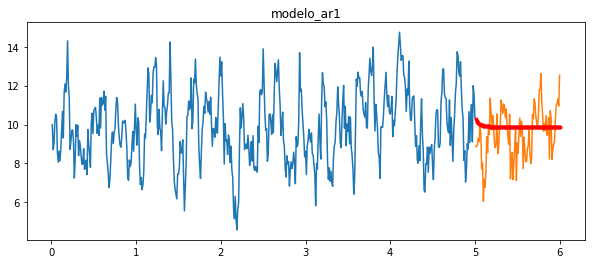

In [53]:
previsao(dados_ar1,'modelo_ar1',1)

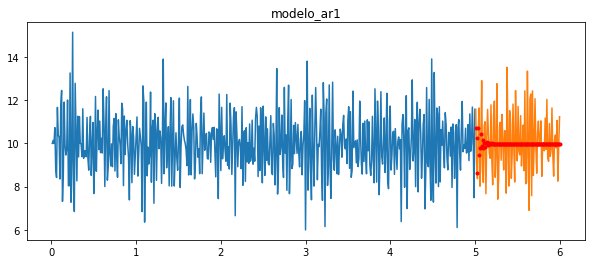

In [54]:
previsao(dados_ar2,'modelo_ar1',2)

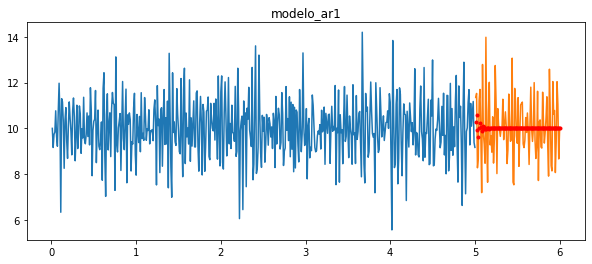

In [55]:
previsao(dados_ar3,'modelo_ar1',3)

## Modelos com autocorelation abrupto e partial autocorrlation suave

In [62]:
def previsao(dados,titulo,ordem):
    dados_p1 = dados[0:500]   #treino
    dados_p2 = dados[500:600] #teste
    modelo_arn = smtsa.ARMA(dados_p1['Preco'],order=(0,ordem)).fit()
    modelo_previsto = modelo_arn.predict(start=500, end=599)
    plt.figure(figsize=(10,4))
    plt.plot(dados_p1['Data'],dados_p1['Preco'])
    plt.plot(dados_p2['Data'],dados_p2['Preco'])
    plt.plot(dados_p2['Data'],modelo_previsto,'r.')
    plt.title('{}'.format(titulo))

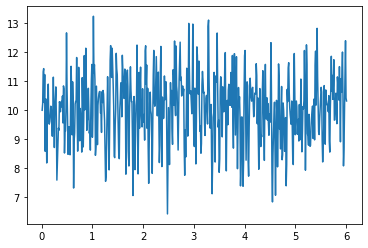

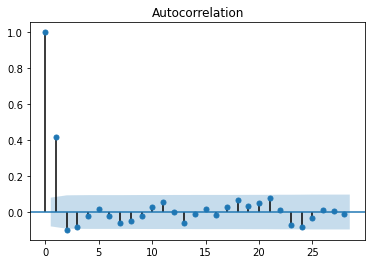

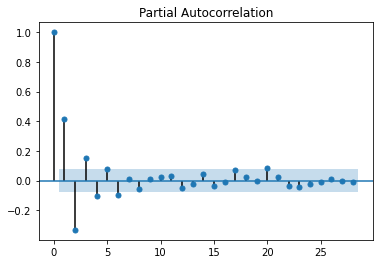

In [63]:
dado_ma1 = pd.read_csv('../01.Dados\produto_ma1.csv')
plt.plot(dado_ma1['Data'], dado_ma1['Preco'])
plot_acf(dado_ma1['Preco']);# Decaimento suave
plot_pacf(dado_ma1['Preco']);# Decaimento abrupto

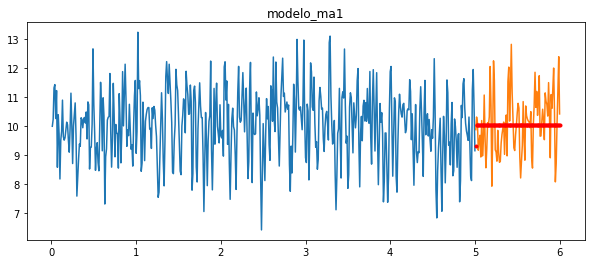

In [64]:
previsao(dado_ma1,'modelo_ma1',1)

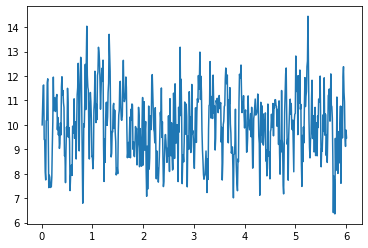

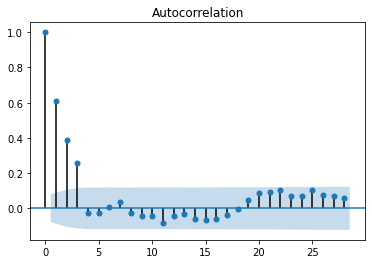

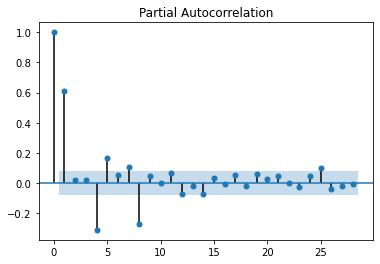

In [70]:
dado_ma3 = pd.read_csv('../01.Dados\produto_ma3.csv')
plt.plot(dado_ma3['Data'], dado_ma3['Preco'])
plot_acf(dado_ma3['Preco']);# Decaimento suave
plot_pacf(dado_ma3['Preco']);# Decaimento abrupto

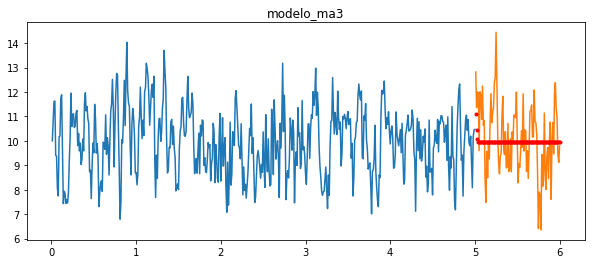

In [71]:
previsao(dado_ma3,'modelo_ma3',3)

# Previsões de modelos - ARMA

In [72]:
def previsao(dados,titulo,ordem):
    dados_p1 = dados[0:500]   #treino
    dados_p2 = dados[500:600] #teste
    modelo_arn = smtsa.ARMA(dados_p1['Preco'],order=(ordem,ordem)).fit()
    modelo_previsto = modelo_arn.predict(start=500, end=599)
    plt.figure(figsize=(10,4))
    plt.plot(dados_p1['Data'],dados_p1['Preco'])
    plt.plot(dados_p2['Data'],dados_p2['Preco'])
    plt.plot(dados_p2['Data'],modelo_previsto,'r')
    plt.title('{}'.format(titulo))

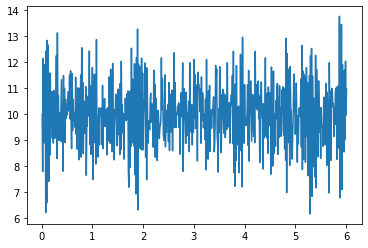

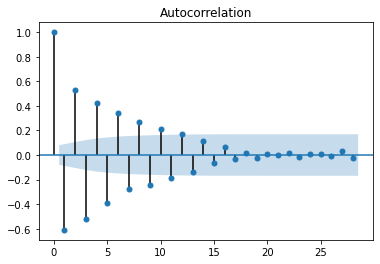

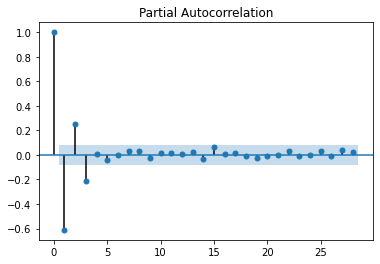

In [73]:
dado_arma1 = pd.read_csv('../01.Dados\produto_arma1_1.csv')
plt.plot(dado_arma1['Data'],dado_arma1['Preco'])
plot_acf(dado_arma1['Preco']);
plot_pacf(dado_arma1['Preco']);

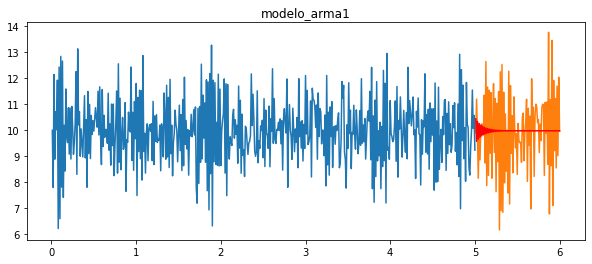

In [74]:
previsao(dado_arma1,'modelo_arma1',1)

# Previsão ARMA real

In [108]:
def previsao(dados,titulo,or_ar,or_ma):
    
    #Dados de treino e teste
    dados_p1 = dados[:26][:]   #treino
    dados_p2 = dados[26:][:]   #teste
    
    # Order Modelo autoregressivo de ordem 1 combinando a um modelo de média movel de ordem 2
    modelo_arn = smtsa.ARMA(dados_p1['Preco'].values,order=(or_ar,or_ma)).fit();
    modelo_previsto = modelo_arn.predict(start=26, end=35)
    
    #Exibis os dados
    plt.figure(figsize=(12,4))
    
    plt.plot(dados_p1['Data'],dados_p1['Preco'])
    plt.plot(dados_p1['Data'],modelo_arn.fittedvalues,'.')
    plt.title('{}'.format(titulo))
    
    plt.plot(dados_p2['Data'],dados_p2['Preco'])
    plt.plot(dados_p2['Data'],modelo_previsto,'r.')
    plt.title('{}'.format(titulo));
    
    modelo_cres = smtsa.ARIMA(dados_p1['Preco'].values,order=(1,1,2)).fit()
    modelo_cres.plot_predict(26,35);
    plt.plot(np.linspace(0,9,10),dados_p2['Preco'])

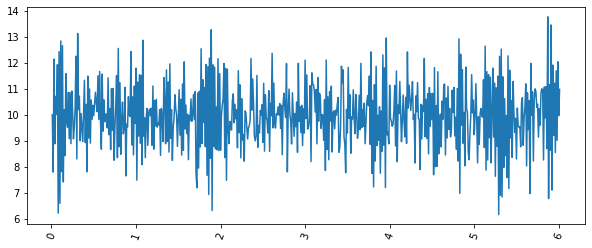

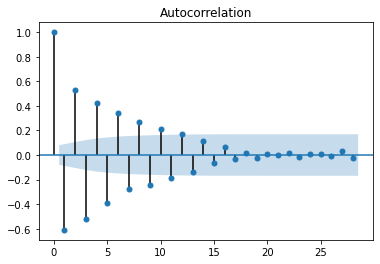

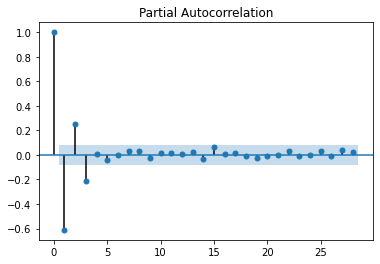

In [88]:
dado_arma1 = pd.read_csv('../01.Dados\produto_arma1_1.csv')
plt.figure(figsize=(10,4))
plt.plot(dado_arma1['Data'],dado_arma1['Preco'])
plt.xticks(rotation=70);
plot_acf(dado_arma1['Preco']);
plot_pacf(dado_arma1['Preco']);

Decaimento exponticial

In [90]:
#previsao(dado_arma1,'dado_arma1',1,2)

# Resolvendo o problema do ARMA

o modelo arma assume uma média estacionária sobre os dados.

# Previsão com dados ARIMA - previsão e estacionaridade

ARIMA(p,d,q) com o parâmetro d de diferenciação

In [91]:
cresc = pd.read_csv('../01.Dados\produto_crescente.csv')
cresc.head()

,Data,Preco
0,1-01,2.660
1,1-02,1.459
2,1-03,1.831
3,1-04,1.193
4,1-05,1.803


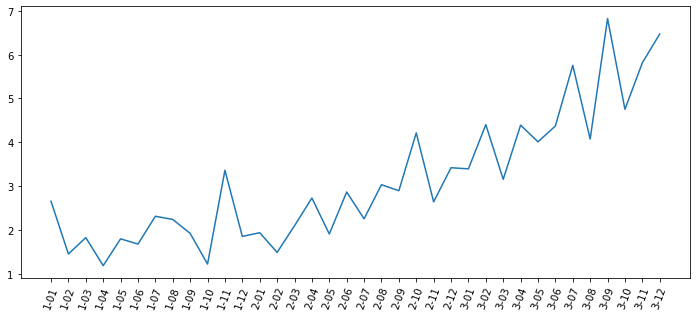

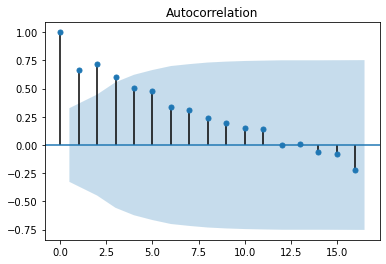

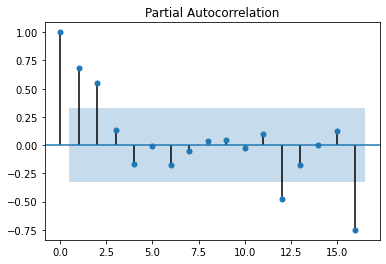

In [93]:
plt.figure(figsize=(12,5))
plt.plot(cresc['Data'],cresc['Preco'])
plt.xticks(rotation=70);
plot_acf(cresc['Preco']);
plot_pacf(cresc['Preco']);

In [94]:
cresc.shape

(36, 2)

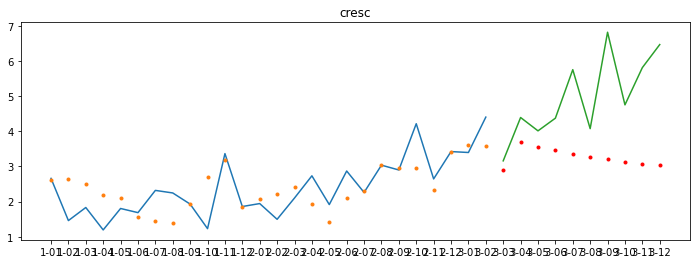

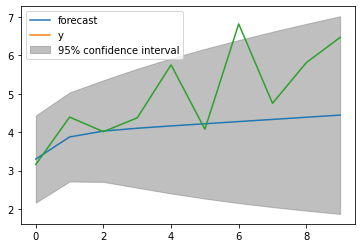

In [109]:
previsao(cresc,'cresc',1,2)

In [56]:
!pip install pmdarima

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20


In [110]:
# Procura os melhores parametros para o arima
from pmdarima import auto_arima

In [112]:
#Dados de treino e teste
dados_p1 = cresc[:26][:]   #treino
dados_p2 = cresc[26:][:]   #teste

modelo_busca = auto_arima(dados_p1['Preco'].values, 
                          start_p=0,start_q=0, max_p=6,max_q=6,
                          d=1,seasonal=False,Trace=True,
                          error_action='ignore',suppress_warnings=True,
                          stepwise=False)

AIC - information criterion BIC - base information criterion

In [113]:
modelo_busca.aic()

51.93216577937017

In [116]:
modelo_busca.fit(dados_p1['Preco'].values)

ARIMA(order=(3, 1, 2), suppress_warnings=True)

In [117]:
valores_previstos = modelo_busca.predict(n_periods=10)

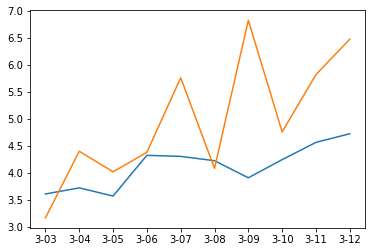

In [120]:
plt.plot(dados_p2['Data'],valores_previstos)
plt.plot(dados_p2['Data'],dados_p2['Preco'])

não teve uma linha reta

ARIMA não considera sazonalidade, então existe o SARIMA que trabalha com isso:

SARIMA(p,d,q)ou[(P,D,Q,m)]
m - numero por observações por ciclo

In [123]:
from pmdarima.arima.utils import nsdiffs
D = nsdiffs(dados_p1['Preco'].values,m=2,max_D=12,test='ch')
D

1

## Função autoarima

In [126]:
modelo_busca2 = auto_arima(dados_p1['Preco'].values, start_p=0,
                           start_q=0,max_p=6,max_q=6,d=1,D=1,
                           start_Q=1,start_P=1, max_P=4,max_Q=4,
                           m=2,seasonal=True,Trace=True,
                           error_action='ignore',supress_warings=True,
                           stepwise=False)

C:\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Python38\lib\site-packages\statsmodels\tsa\state

In [127]:
modelo_busca.aic()

51.93216577937017

In [128]:
modelo_busca2.aic()

49.210265816323506

In [130]:
modelo_busca2.fit(dados_p1['Preco'].values)

C:\Python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(order=(0, 1, 1), seasonal_order=(2, 1, 2, 2))

In [132]:
valores_preditos2 = modelo_busca2.predict(n_periods=10)

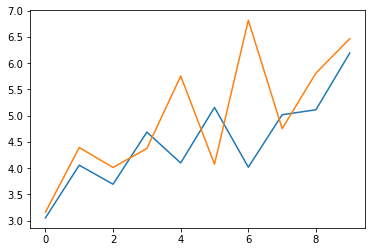

In [134]:
plt.plot(valores_preditos2)
plt.plot(np.linspace(0,9,10),dados_p2['Preco'])

Agora está mais ajustado os dados

# Data set lynx para previsão de dados

In [135]:
from pmdarima.datasets import load_lynx

In [136]:
dado_lynx = load_lynx()
dado_lynx.shape

(114,)

In [137]:
from pmdarima import model_selection
treino,teste = model_selection.train_test_split(dado_lynx, train_size=100)

In [138]:
teste1 = teste[:10]
teste2 = teste[10:]

In [139]:
modelo_arima = auto_arima(treino, start_p =1, start_q=1,
                          d=0,max_p=5,max_q=5,
                          supress_warnings=True,stepwiase=True,
                          error_action='ignore')

In [140]:
previsoes = modelo_arima.predict(n_periods=teste1.shape[0])


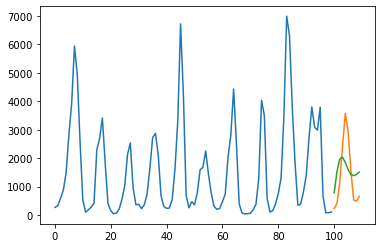

In [144]:
plt.plot(np.arange(0,treino.shape[0]),treino)
plt.plot(np.arange(treino.shape[0],treino.shape[0]+teste1.shape[0]),teste1)
plt.plot(np.arange(treino.shape[0],treino.shape[0]+teste1.shape[0]),previsoes)

In [145]:
modelo_arima.update(teste1)

ARIMA(order=(2, 0, 0))

In [146]:
novas_pred = modelo_arima.predict(n_periods=teste2.shape[0])

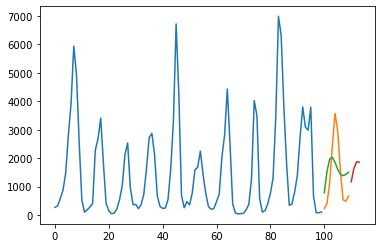

In [151]:
plt.plot(np.arange(0,treino.shape[0]),treino)
plt.plot(np.arange(treino.shape[0],treino.shape[0]+teste1.shape[0]),teste1)
plt.plot(np.arange(treino.shape[0],treino.shape[0]+teste1.shape[0]),previsoes)
plt.plot(np.arange(treino.shape[0]+teste1.shape[0],
         treino.shape[0]+teste1.shape[0]+teste2.shape[0]),
         novas_pred)

# Salvando o modelo

In [152]:
import joblib
joblib.dump(modelo_busca2, 'sarima.pkl')

['sarima.pkl']

In [153]:
previsao_joblib = joblib.load('sarima.pkl').predict(n_periods=10)
np.allclose(valores_preditos2,previsao_joblib)

True